<a href="https://colab.research.google.com/github/Omerkhalid-1/Email-Spam-Classification-ML/blob/main/Email_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Used for heatmaps.
import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Importing libraries necessary for Model Building and Training

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
import nltk
import glob
import errno
from sklearn.manifold import  TSNE
from sklearn.utils import shuffle
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Read the dataset from the file.

In [4]:
# Authenticate and create the PyDrive client.
drive.mount('/content/drive')

# Replace `'path/to/your/file.csv'` with the actual path to your CSV file.
with open('/content/drive/My Drive/emails.csv', 'r') as file:
  # Read and process the contents of the CSV file.
  # You can use libraries like pandas to further analyze the data.
  # For example:
  import pandas as pd
  emails_df = pd.read_csv(file)
  print(emails_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [5]:
print(emails_df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


## Separate into spam and ham dataframes

In [6]:

spam_df = emails_df[emails_df['spam'] == 1]
ham_df = emails_df[emails_df['spam'] == 0]

# Visualize the data.
print('Spam Percentage =',(len(spam_df)/len(emails_df))*100,'%')

Spam Percentage = 23.88268156424581 %


## Function to preprocess text by removing 'Subject' and punctuations.


In [7]:
import re

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove the word 'Subject'
    text = re.sub(r'\bsubject\b', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = text.strip()

    return text

# Example usage
sample_text = """
Subject: Hello World!
This is an example email with a link: https://example.com and an email address: example@example.com.
"""
cleaned_text = preprocess_text(sample_text)
print(cleaned_text)


hello world
this is an example email with a link  and an email address


In [8]:
ham_df['text'] = ham_df['text'].apply(preprocess_text)
spam_df['text'] = spam_df['text'].apply(preprocess_text)
emails_df['text'] = emails_df['text'].apply(preprocess_text)

## Dataset after Preprocessing.

In [9]:
ham_df['text']
spam_df['text']

0       naturally irresistible your corporate identity...
1       the stock trading gunslinger  fanny is merrill...
2       unbelievable new homes made easy  im wanting t...
3       color printing special  request additional inf...
4       do not have money  get software cds from here ...
                              ...                        
1363    are you ready to get it   hello   viagra is th...
1364    would you like a   gas card   don  t let the c...
1365    immediate reply needed  dear sir   i am dr jam...
1366    wanna see me get fisted   fist  bang will show...
1367    hot stock info  drgv announces another press r...
Name: text, Length: 1368, dtype: object

## Feature extraction using count vectorizer.
#### This counts the frequency of the word in the specific message.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(emails_df['text'])

### Get all the different words that are used in the emails into a feature.

In [11]:
features_name = vectorizer.get_feature_names_out()
print(features_name)


['aa' 'aaa' 'aaaenerfax' ... 'zzn' 'zzncacst' 'zzzz']


In [12]:
spamham_countVectorizer.shape

(5728, 33710)

In [13]:
label=emails_df['spam']
X=spamham_countVectorizer
y=label

In [14]:
X.shape

(5728, 33710)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

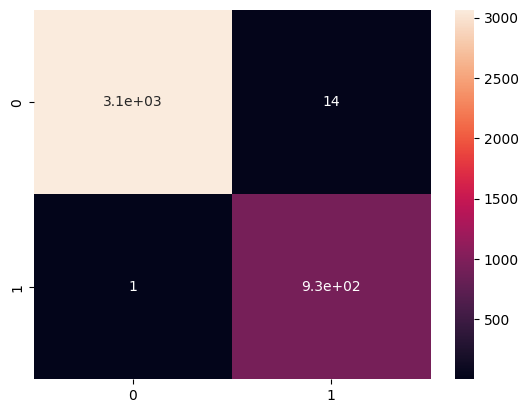

In [22]:
sns.heatmap(cm,annot=True)

In [23]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
cm=confusion_matrix(y_test,y_predict_test)

<Axes: >

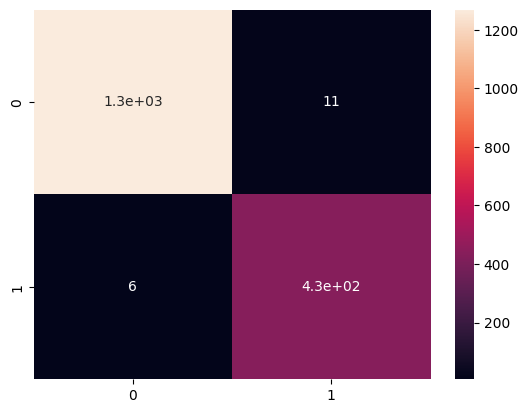

In [25]:
sns.heatmap(cm,annot=True)

Result of the algorthms.

In [26]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1280
           1       0.98      0.99      0.98       439

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



## Classsifcation using NaviesBayes Multinomial

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
X = emails_df['text']
y = emails_df['spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r'\b[A-Za-z]+\b')),
    ('clf', MultinomialNB())
])

# Use TF-IDF to convert the words into vector based on the frequency of the word.

# Define parameter grid for GridSearch
param_grid = {
    'tfidf__max_df': [0.75, 0.85, 0.95],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.01, 0.1, 1.0]
}

# Perform GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'clf__alpha': 0.01, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.9869
Confusion Matrix:
[[855   1]
 [ 14 276]]


<Axes: >

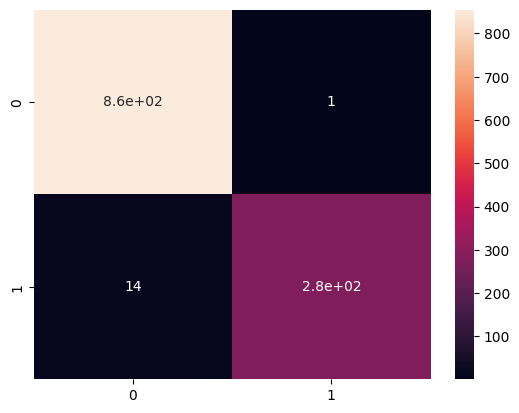

In [ ]:
sns.heatmap(conf_matrix,annot=True)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       1.00      0.95      0.97       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [33]:
# Example email text
new_email = "Subject: Request for Holiday Approval"
# Preprocess the new email text (assuming preprocess_text function is defined)
processed_email = preprocess_text(new_email)

# Use the grid_search model to predict
predicted_label = grid_search.predict([processed_email])

# Print the predicted label
if predicted_label[0] == 1:
    print("The email is predicted to be SPAM.")
else:
    print("The email is predicted to be NOT SPAM.")


The email is predicted to be NOT SPAM.


In [35]:
# Example dummy emails
ham_email_1 = "Hey John, just checking in on the project status. Let's sync up tomorrow."
ham_email_2 = "Reminder: Team meeting at 10 AM tomorrow in the conference room."
spam_email_1 = "Congratulations! You've won a free vacation. Click here to claim your prize."
spam_email_2 = "Urgent: Your account needs immediate verification. Please click the link to proceed."


# Preprocess the emails
processed_ham_email_1 = preprocess_text(ham_email_1)
processed_ham_email_2 = preprocess_text(ham_email_2)
processed_spam_email_1 = preprocess_text(spam_email_1)
processed_spam_email_2 = preprocess_text(spam_email_2)

# Use the classifier to predict
predicted_label_1 = grid_search.predict([processed_ham_email_1])[0]
predicted_label_2 = grid_search.predict([processed_ham_email_2])[0]
predicted_label_3 = grid_search.predict([processed_spam_email_1])[0]
predicted_label_4 = grid_search.predict([processed_spam_email_2])[0]

# Print the predictions
print(f"Ham Email 1 Prediction: {'SPAM' if predicted_label_1 == 1 else 'NOT SPAM'}")
print(f"Ham Email 2 Prediction: {'SPAM' if predicted_label_2 == 1 else 'NOT SPAM'}")
print(f"Spam Email 1 Prediction: {'SPAM' if predicted_label_3 == 1 else 'NOT SPAM'}")
print(f"Spam Email 2 Prediction: {'SPAM' if predicted_label_4 == 1 else 'NOT SPAM'}")


Ham Email 1 Prediction: NOT SPAM
Ham Email 2 Prediction: NOT SPAM
Spam Email 1 Prediction: SPAM
Spam Email 2 Prediction: SPAM
